In [1]:
import pandas as pd

# Data Visualization

<img src="../images/sec05-00_objectives.png">

## 1 - The Plot Method

### The Matplotlib API

Pandas uses the `Matplotlib API` to create charts and visualize data
* This is an integration with the main Matplotlib library

### The Plot Method

You can visualize a DataFrame by using the `.plot()` method
* This creates a `line chart` by default, using the row index as the x-axis and plotting each numerical column as a separate series on the  y-aix

**PRO TIP:** Add `";"` at the end of the code (`sales_df.plot();`) to remove "<AxesSubplot;>" when using Jupyter Notebooks

You can `change the x-axis` by setting a different index or using the "x" argument _(The index is used as the x-axis by default)_

<img src="../images/sec05-01_plot_method_1.png">

<img src="../images/sec05-02_plot_method_2.png">

You can `select series` to plot with the `.loc[]` accessor or using the "y" argument

<img src="../images/sec05-03_plot_method_3.png">

#### Practice

In [5]:
transactions = pd.read_csv('../retail/transactions.csv', parse_dates=['date']) # use parse_dates to convert date column to datetime

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

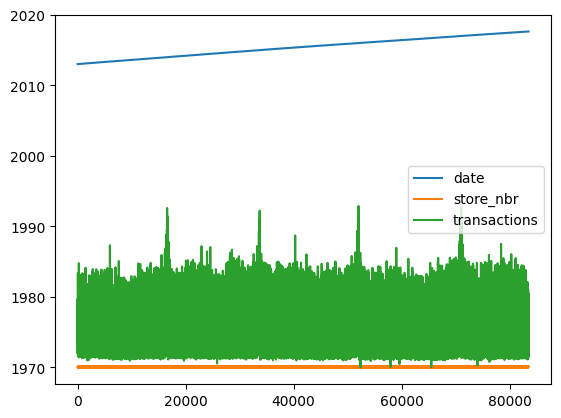

In [3]:
# gonna get all the numerical columns plotted (pretty ugly): 

transactions.plot()

<Axes: xlabel='date'>

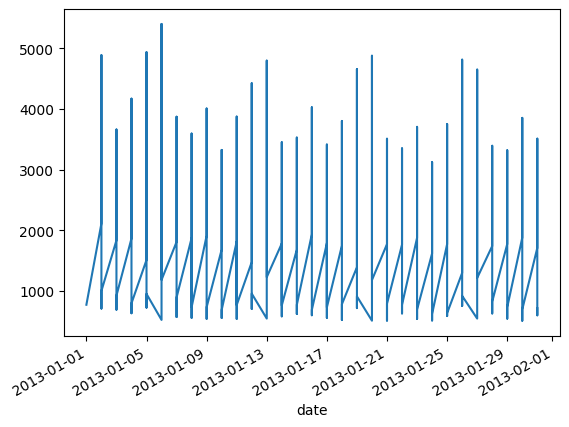

In [5]:
transactions.set_index('date').loc["2013-01", "transactions"].plot() # set the index to date and then plot

<Axes: xlabel='date'>

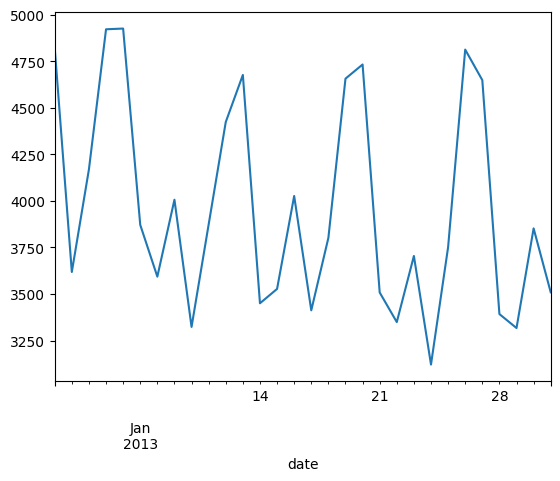

In [6]:
# we need to have one row for each index value 
# to fix this, filter down to just one store 
# see how does store 44 do over time 

transactions.query("store_nbr == 44").set_index('date').loc["2013-01", "transactions"].plot()

In [8]:
# check - now we have one date per row

transactions.query("store_nbr == 44").set_index('date') #.loc["2013-01", "transactions"].plot()

,store_nbr,transactions
date,,
2013-01-02,44,4821
2013-01-03,44,3618
2013-01-04,44,4169
2013-01-05,44,4921
2013-01-06,44,4925
...,...,...
2017-08-11,44,4418
2017-08-12,44,4277
2017-08-13,44,4392


In [9]:
# another thing you might do is to set up your dataframe ahead of time

transactions_44 = transactions.loc[transactions['store_nbr'] == 44, ['date', 'transactions']]

transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

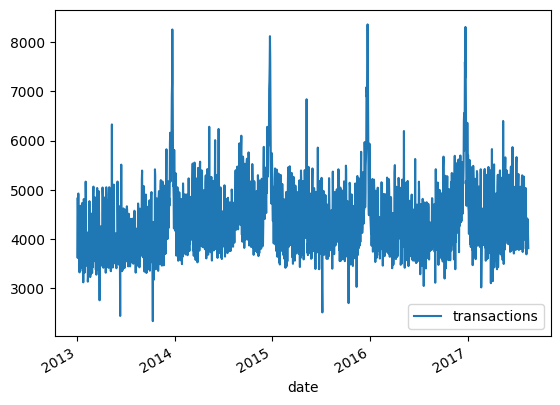

In [10]:
transactions_44.set_index('date').plot()

<Axes: xlabel='date'>

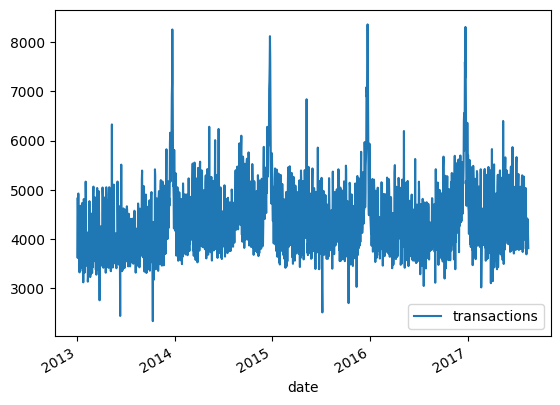

In [12]:
# we can also specify the x and y axis

transactions_44.plot(x='date', y='transactions')

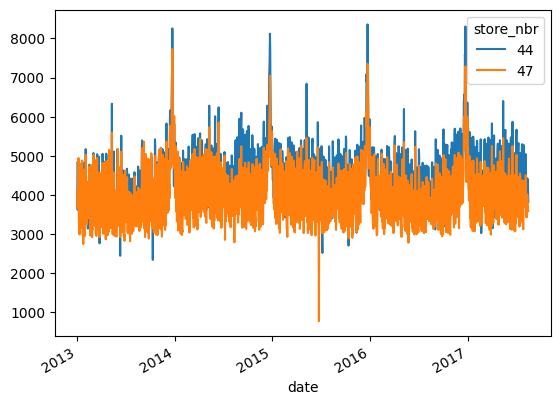

In [13]:
# How are sales of store 44 and 47 compared to each other over time?

(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot()
); # the semicolon suppresses the output

## 2 - Chart Formatting

<img src="../images/sec05-04_chart_formatting.png">

More options here - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Colors - https://matplotlib.org/stable/tutorials/colors/colormaps.html

<Axes: xlabel='date'>

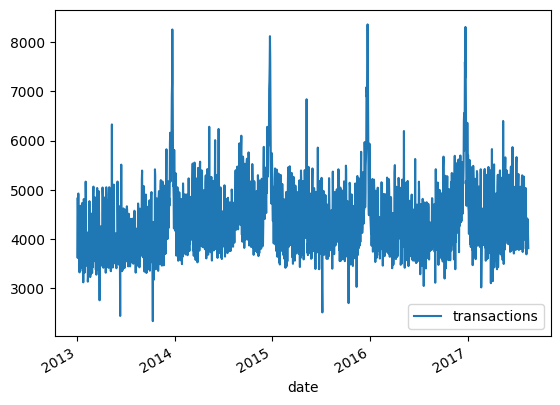

In [14]:
transactions_44.set_index('date').plot() 

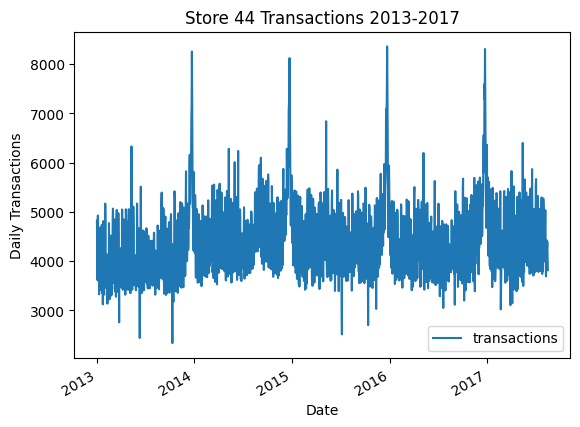

In [16]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013-2017',
    xlabel='Date',
    ylabel='Daily Transactions'
);

### Chart Colors

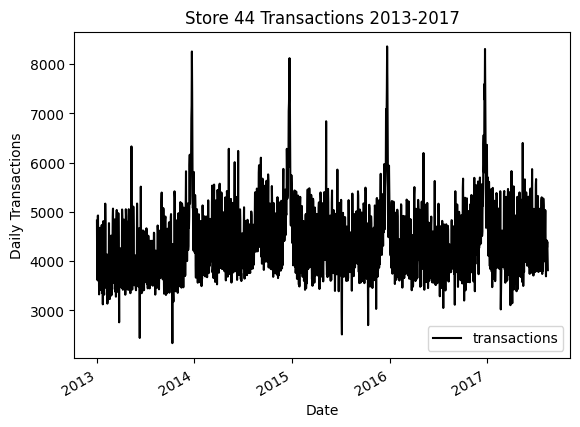

In [17]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013-2017',
    xlabel='Date',
    ylabel='Daily Transactions',
    c='k' # short for color='black' 
);

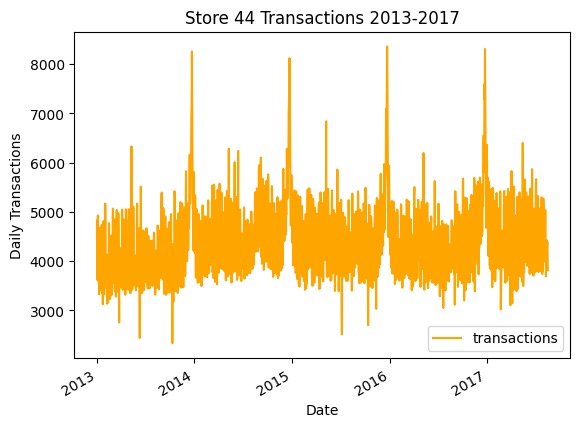

In [18]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013-2017',
    xlabel='Date',
    ylabel='Daily Transactions',
    color='orange'
);

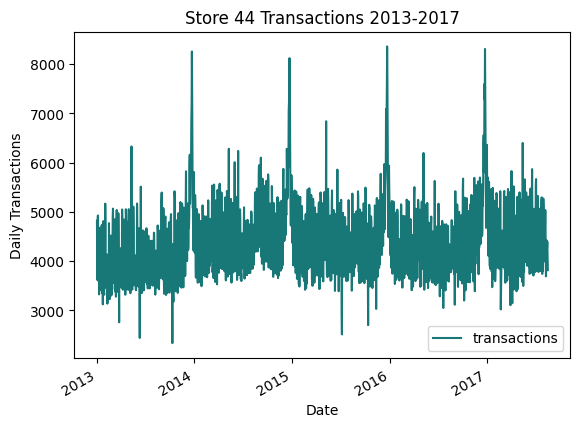

In [19]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013-2017',
    xlabel='Date',
    ylabel='Daily Transactions',
    color='#187878' # Google hex color picker
);

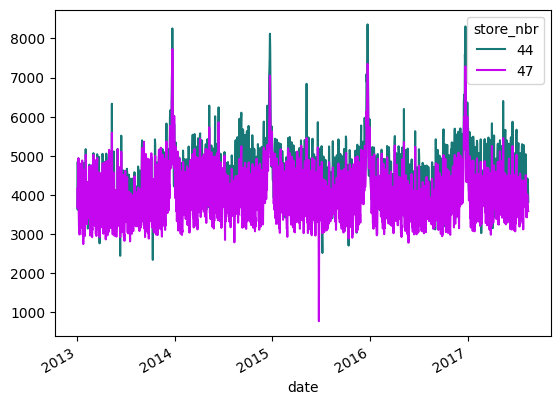

In [20]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(color=['#187878', '#c507f0'])
);

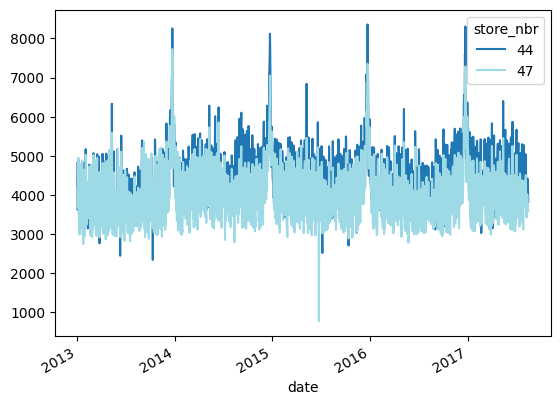

In [22]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(cmap='tab20') # https://matplotlib.org/stable/tutorials/colors/colormaps.html
);

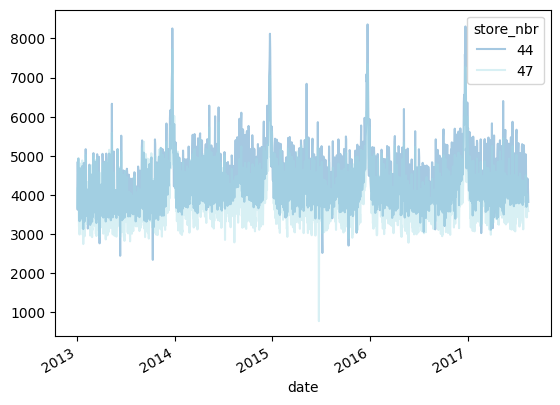

In [25]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(cmap='tab20', 
       alpha=.4)  # transparency (the alpha argument will make our graph more transparent) between 0 and 1
);

### Line Stypes

<img src="../images/sec05-05_line_style.png">

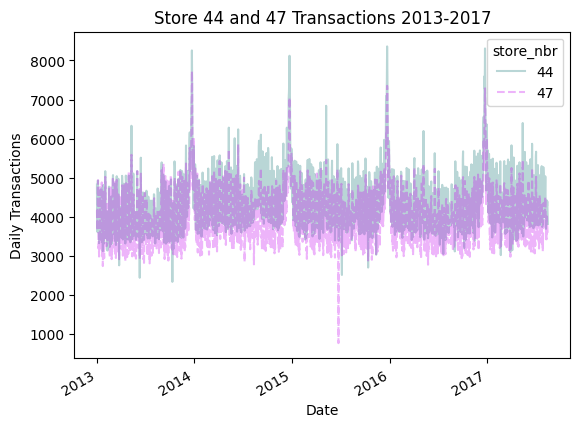

In [27]:
(transactions
 .query("store_nbr in [44, 47]")
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'] # solid and dashed lines
 )
);

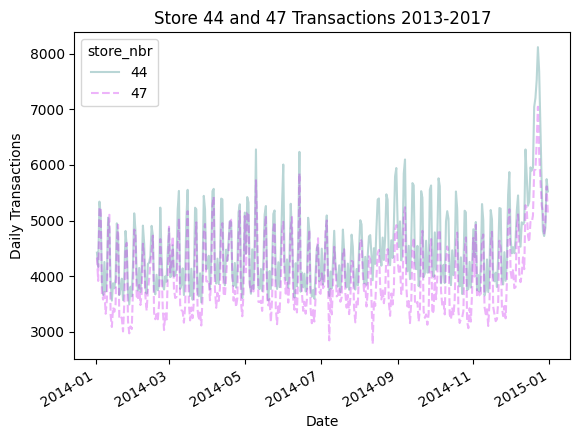

In [28]:
# filter down to a single year to make this more clear

(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'] # solid and dashed lines
 )
);

### Chart Legend & Gridlines

<img src="../images/sec05-06_chart_legend.png">

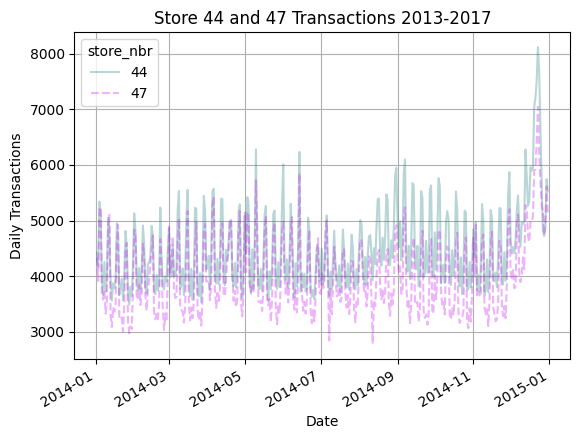

In [29]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'],
     grid=True # adds grid lines
 )
);

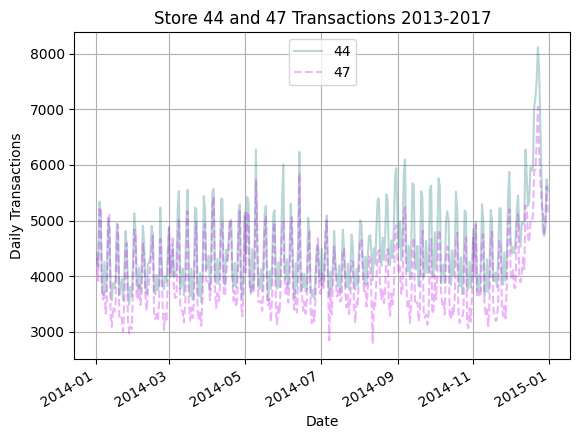

In [30]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'],
     grid=True # adds grid lines
 )).legend(loc='upper center'); # legend

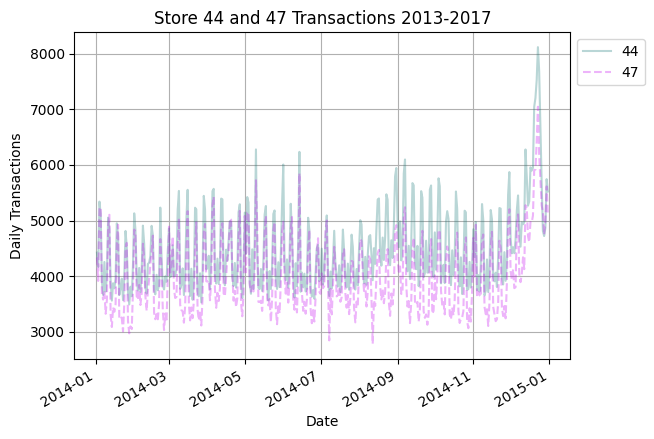

In [31]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'],
     grid=True # adds grid lines
 )).legend(bbox_to_anchor=(1, 1)); # pushes the legend to the right

### **PRO TIP:** Chart Styles

<img src="../images/sec05-07_chart_styles.png">

In [3]:
import seaborn as sns

sns.set_style('darkgrid')

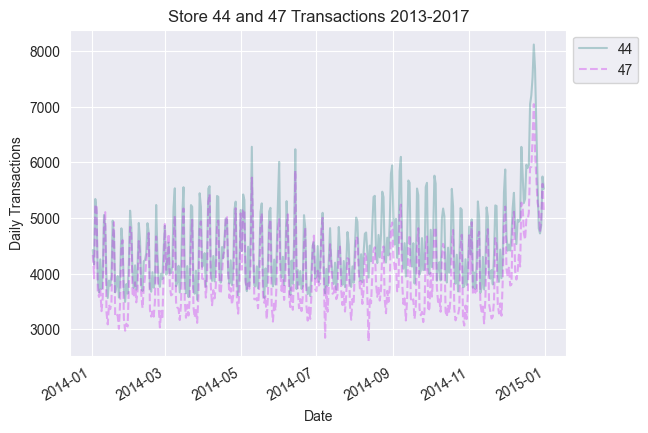

In [6]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     style=['-', '--'],
     grid=True # adds grid lines
 )).legend(bbox_to_anchor=(1, 1));

<Axes: title={'center': 'Store 44 and 47 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

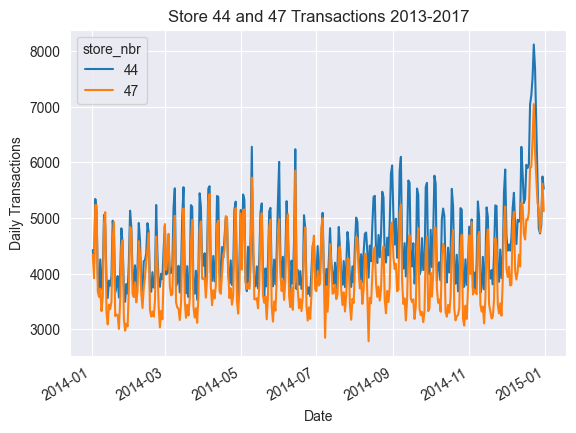

In [7]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
    #  color=['#187878', '#c507f0'],
    #  alpha=.3,
    #  style=['-', '--'],
    #  grid=True # adds grid lines
 ))#.legend(bbox_to_anchor=(1, 1));

In [9]:
import matplotlib

matplotlib.style.use('fivethirtyeight')

<Axes: title={'center': 'Store 44 and 47 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

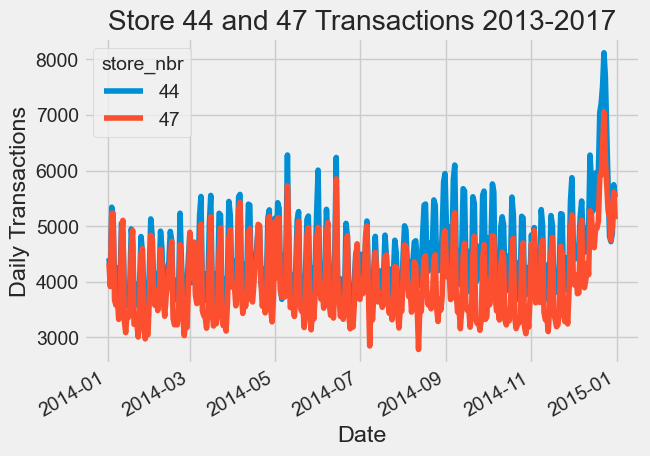

In [10]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
    #  color=['#187878', '#c507f0'],
    #  alpha=.3,
    #  style=['-', '--'],
    #  grid=True # adds grid lines
 ))#.legend(bbox_to_anchor=(1, 1));

<Axes: title={'center': 'Store 44 and 47 Transactions 2013-2017'}, xlabel='Date', ylabel='Daily Transactions'>

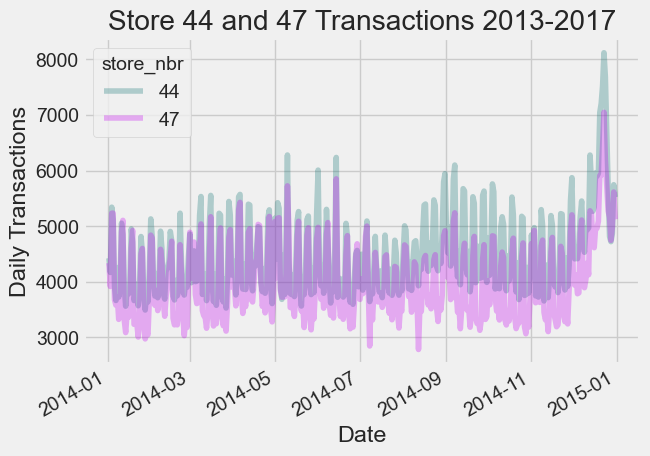

In [11]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
    #  style=['-', '--'],
    #  grid=True # adds grid lines
 ))#.legend(bbox_to_anchor=(1, 1));

### Subplots

You can leverage `subplots` to create a separate chart for each series 

```python
sales_df.set_index("date").plot(subplots=True);
```

### Chart Size

You can adjust the `size` of the plot or subplots (_in inches_) using `figsize`

<img src="../images/sec05-08_subplots.png">

<img src="../images/sec05-09_chart_size.png">



array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

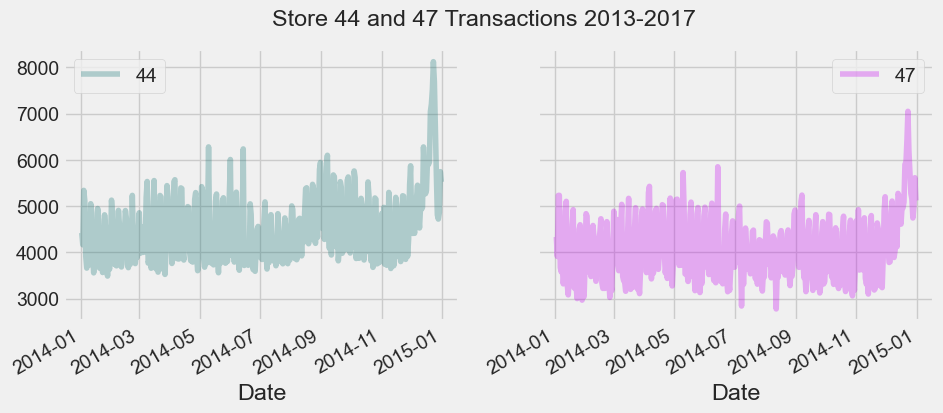

In [18]:
(transactions
 .query("store_nbr in [44, 47] and date.dt.year == 2014") 
 .pivot_table(index='date', columns='store_nbr')
 .droplevel(0, axis=1)
 .plot(
     title='Store 44 and 47 Transactions 2013-2017',
     xlabel='Date',
     # ylabel='Daily Transactions',
     color=['#187878', '#c507f0'],
     alpha=.3,
     subplots=True,
     layout=(1, 2), # 1 row, 2 columns (1 by 2: side by side)
     sharey=True,
     figsize=(10, 4)
    #  style=['-', '--'],
    #  grid=True # adds grid lines
 ))#.legend(bbox_to_anchor=(1, 1));

## 3 - Chart Types

### Changing Chart Types

You can `change chart types` with the _"kind"_ argument or the attribute for each chart

<img src="../images/sec05-10_change_chart_types.png">

### Common Chart Types

<img src="../images/sec05-11_common_chart_types.png">

### Line Charts

`Line charts` are used for showing `trends and changes over time`
* They are the default chart type when using `.plot()`
* The x-axis should be continuous! 



### Bar Charts

`Bar charts` are used for making comparisons with `categorical data`

<img src="../images/sec05-12_bar_1.png">

<img src="../images/sec05-13_bar_2.png">

In [19]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [20]:
transactions.groupby(['store_nbr']).agg({'transactions': 'sum'})

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877
6,3065896
7,2995993
8,4637971
9,3516162


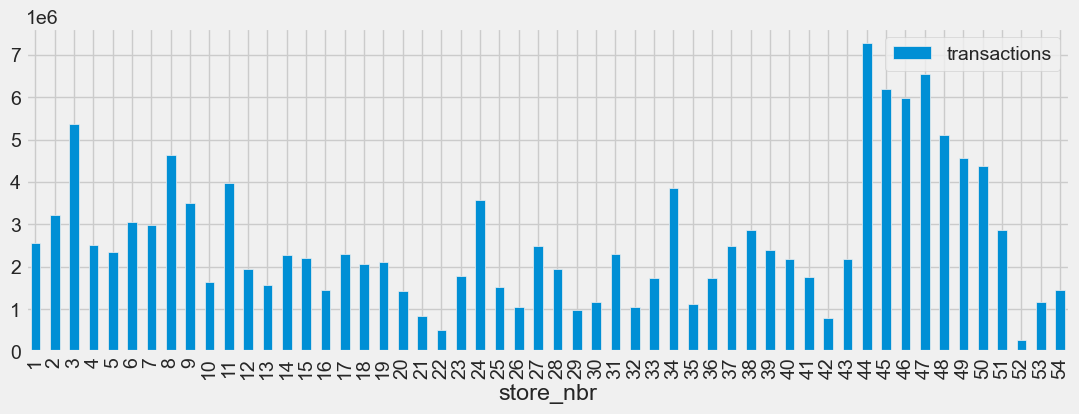

In [22]:
# we can see stores in the 40s have the most transactions (outpaced the others by a lot)

transactions.groupby(['store_nbr']).agg({'transactions': 'sum'}).plot.bar(figsize=(12, 4));

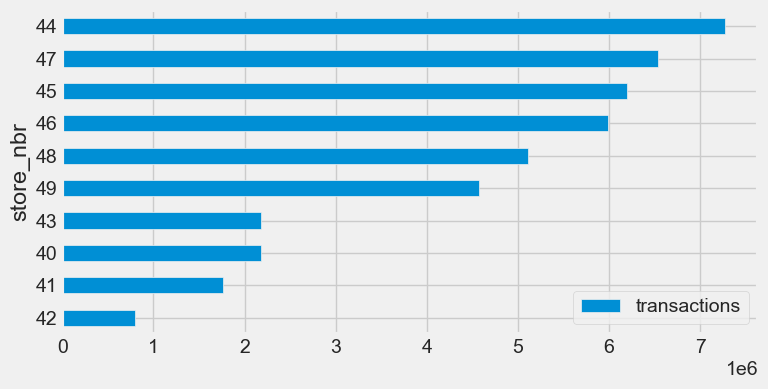

In [27]:
store_40s = list(range(40, 50))

(transactions
 .query("store_nbr in @store_40s")
 .groupby(['store_nbr'])
 .agg({'transactions': 'sum'})
 .sort_values(by='transactions') # sort by transactions
 .plot.barh(figsize=(8, 4)) # horizontal bar chart
 );

### Grouped Bar Charts
Plotting multiple series with a bar plot will create a `grouped bar chart`
* _The bars are grouped by the DataFrame index_

### Stacked Bar Charts
Specify _`stacked=True`_ when plotting multiple series to create a `stacked bar chart`
* This still lets you compare the categories, but also shows the composition of each category

    * _You can set custom labels using "set_xticklabels"_

### 100% Stacked Bar Charts
Calculate percent of total values by index to create a `100% stacked bar chart`
* This emphasizes the difference in composition between categories (_instead of absolute values_)

<img src="../images/sec05-14_100_percent_stacked_bar.png">

In [32]:
store_40s = list(range(40, 50))

transactions_40s = (transactions
 .query("store_nbr in @store_40s & date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions['date'].dt.month,
              columns=transactions['store_nbr'],
              values='transactions',
              aggfunc='sum')
 )

transactions_40s

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


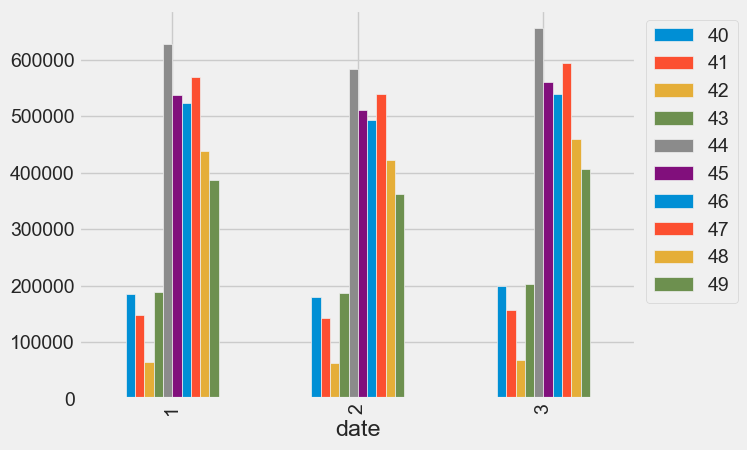

In [36]:
# grouped bar chart

transactions_40s.plot.bar().legend(bbox_to_anchor=(1, 1));

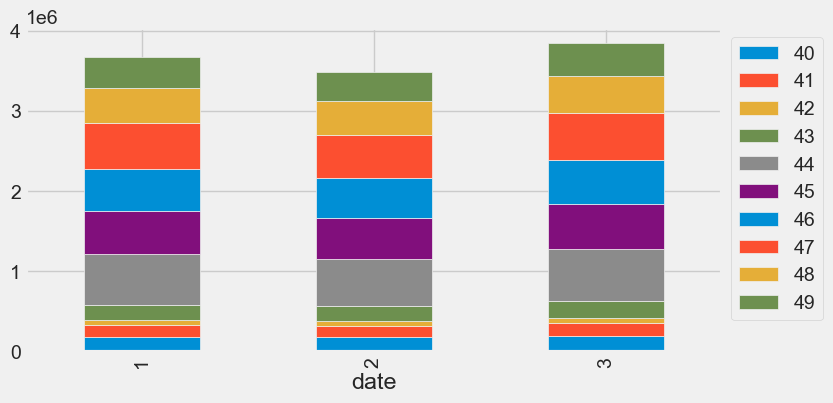

In [38]:
# stacked bar chart

transactions_40s.plot.bar(stacked=True, figsize=(8, 4)).legend(bbox_to_anchor=(1, 1));

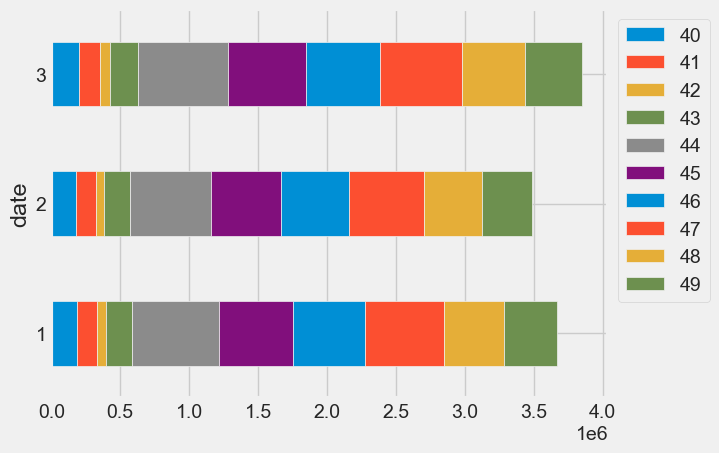

In [40]:
# makes it horizontal

transactions_40s.plot.barh(stacked=True).legend(bbox_to_anchor=(1, 1));

In [42]:
# to get a 100% stacked bar chart

store_40s = list(range(40, 50))

transactions_40s = (transactions
 .query("store_nbr in @store_40s & date.dt.month in [1, 2, 3]")
 .pivot_table(index=transactions['date'].dt.month,
              columns=transactions['store_nbr'],
              values='transactions',
              aggfunc='sum').apply(lambda x: x * 100 / sum(x), axis=1)
 )

transactions_40s

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246


In [43]:
# the above is equivalent to: 
# to get a 100% stacked bar chart, we need to divide each value by the sum of the values in that row

transactions_40s.div(transactions_40s.sum(axis=1), axis=0) * 100

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246


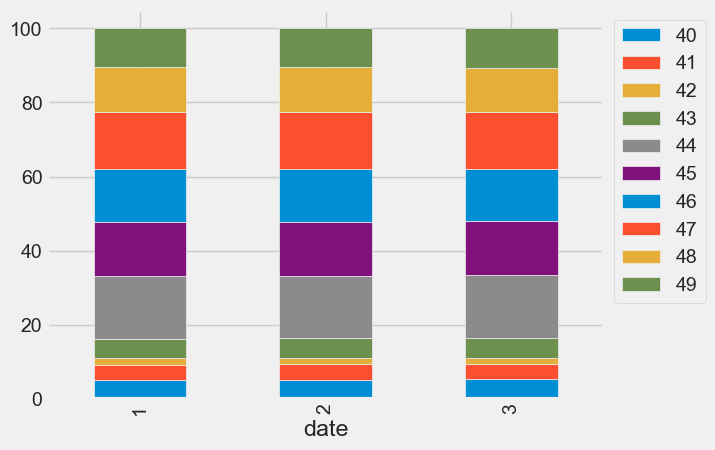

In [44]:
transactions_40s.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1));

### Pie Charts & Scatterplots

In [45]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [51]:
transactions_40s_pie = (transactions
                        .query("store_nbr in @store_40s & date.dt.month in [1, 2, 3]")
                        .groupby(['store_nbr'])
                        .agg({'transactions': 'sum'})
                        )

transactions_40s_pie

,transactions
store_nbr,
40,564515
41,448122
42,194871
43,579435
44,1868114
45,1610965
46,1556157
47,1702525
48,1321544


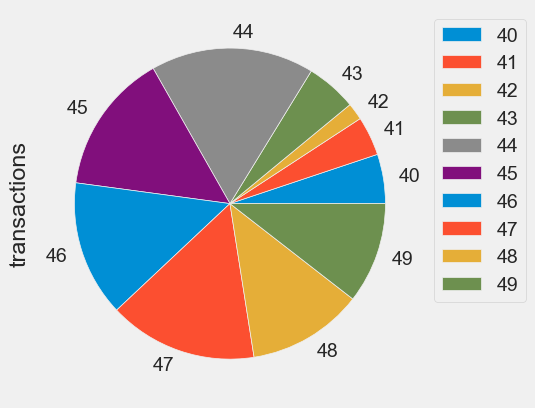

In [52]:
transactions_40s_pie.plot.pie(y='transactions').legend(bbox_to_anchor=(1, 1));

In [54]:
transactions_40s_scatterplot = (transactions
                                .query("store_nbr in @store_40s")
                                .pivot_table(index=transactions['date'].dt.month,
                                             columns=transactions['store_nbr'],
                                             values='transactions',
                                             aggfunc='sum')
                                )

transactions_40s_scatterplot

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071
4,194785,152869,66870,195502,637139,549474,535584,586216,454378,402373
5,208281,166079,69883,202376,671126,570956,554270,597380,469508,421413
6,196988,155688,67692,190156,631016,541302,516034,562559,436015,401579
7,203107,161205,70549,201074,645571,563700,531886,577574,454707,407053
8,182747,146306,63371,182532,596279,514143,485675,524983,419362,365448
9,151905,119653,64763,146055,516233,422178,412455,455021,353820,317871


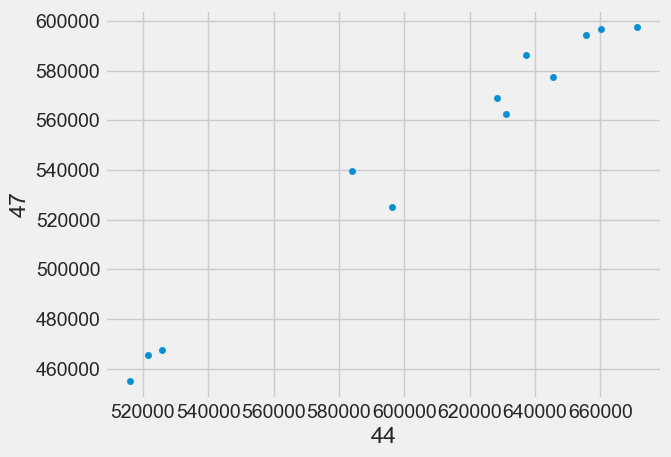

In [58]:
transactions_40s_scatterplot.plot.scatter(x=44, y=47);

### Histograms

<img src="../images/sec05-15_histogram_1.png">

<img src="../images/sec05-16_histogram_2.png">

_alpha: 0 is going to make all of our data invisible, and 1 is going to be solid, and data is going to have the value of 1 by default_

In [60]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [61]:
# just grab the transactions column

transactions.loc[:, 'transactions']

0         770
1        2111
2        2358
3        3487
4        1922
         ... 
83483    2804
83484    1573
83485    2255
83486     932
83487     802
Name: transactions, Length: 83488, dtype: int64

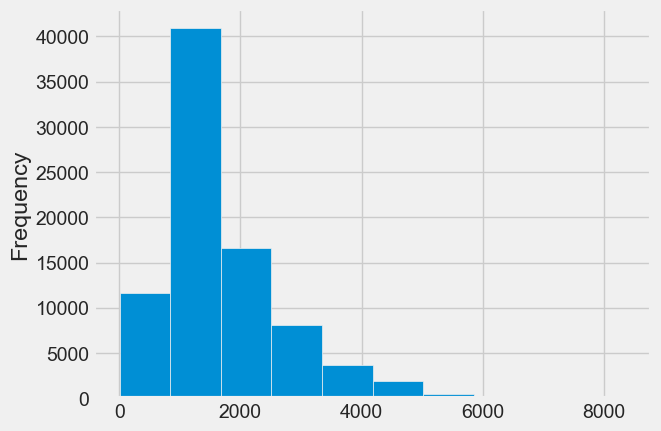

In [62]:
transactions.loc[:, 'transactions'].plot.hist();

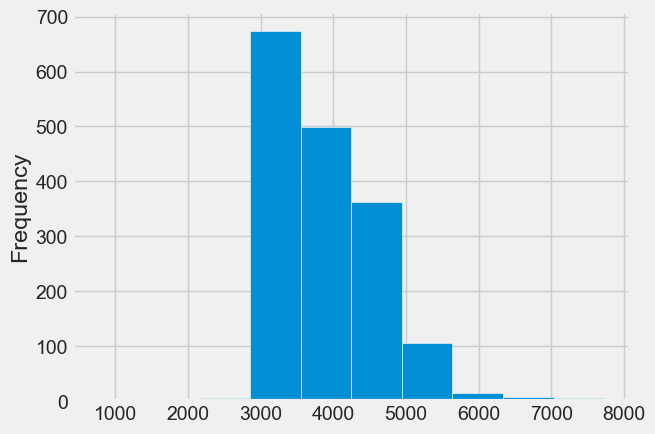

In [63]:
# fitler down to a single store

transactions.loc[transactions["store_nbr"] == 47, 'transactions'].plot.hist();

## 4 - Saving Charts

<img src="../images/sec05-17_save_plots.png">

## 5 - Additional Libraries

<img src="../images/sec05-18_more_viz.png">

## Kew Takeaways

<img src="../images/sec05-19_key_takeaways.png">